In [76]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
import os
from glob import glob
import cv2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from ggplot import *
import matplotlib.pyplot as plt

## Read Data

In [96]:
OUTPUT_CROP_SIZE = 64
IMAGES_BASE_PATH = "101_ObjectCategories/"
imgs_dir_list = os.listdir(IMAGES_BASE_PATH)
allData = []
allClass = []
for i,imgs_dir in enumerate(imgs_dir_list):
    input_image_batch = []
    img_filenames = sorted(glob(IMAGES_BASE_PATH + imgs_dir +'/*.jpg'))
    
    for j,img_file in enumerate(img_filenames):
        input_image = cv2.imread(img_file)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        input_image = cv2.resize(input_image, (OUTPUT_CROP_SIZE, OUTPUT_CROP_SIZE)).astype(float)        
        allData.append(input_image)
        allClass.append(i)
        if(j > 50):
            break
    if(i>9):
        break
X = np.array(allData)
Y = np.array(allClass)


In [93]:
NPPATH = "Np_Data/"    
np_dir_list = os.listdir(NPPATH)
i = 0
allData = []
allLabel = []
allClass = []
for i,path in enumerate(np_dir_list):
    data = np.load(NPPATH + path + "/data.npy")
    label = np.load(NPPATH + path + "/gt.npy")
    if (data.shape[0]> 100):
        continue
    if not(path == "accordion" or path == "ant"):
        continue
    for d,l in zip(data,label):
        allData.append(d)
        allLabel.append(l)
        allClass.append(i)
    if (i == 9):
        break
    
X = np.array(allData)
Y = np.array(allClass)


In [97]:
X = np.reshape(X,[X.shape[0],-1])
print(X.shape,Y.shape)

(513, 12288) (513,)


In [98]:
feature_columns = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X,columns=feature_columns)
df['class'] = Y
df['class'] = df['class'].apply(lambda i : np_dir_list[i])
X, Y = None, None
print("Size if dataframe {}".format(df.shape))

Size if dataframe (513, 12289)


In [99]:
random_perm = np.random.permutation(df.shape[0])

In [101]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feature_columns].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print(pca.explained_variance_ratio_)

[0.36685371 0.06771534 0.04590705]


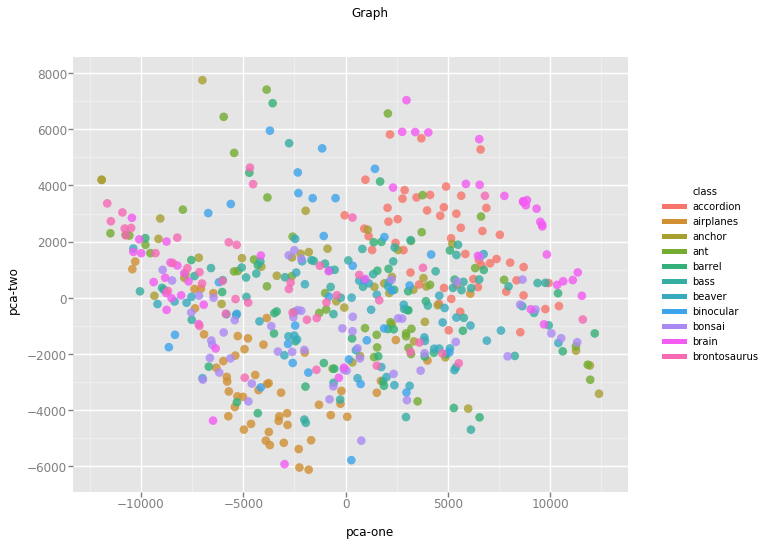

<ggplot: (105928860904)>

In [102]:
chart = ggplot(df.loc[random_perm[:512],:],aes(x='pca-one', y = 'pca-two',color = 'class')) + geom_point(size = 75,alpha = 0.8) + ggtitle("Graph")

chart

In [103]:
n_sne = 513

time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_result = tsne.fit_transform(df.loc[random_perm[:n_sne],feature_columns].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 513 samples in 0.484s...
[t-SNE] Computed neighbors for 513 samples in 7.312s...
[t-SNE] Computed conditional probabilities for sample 513 / 513
[t-SNE] Mean sigma: 2905.151631
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.987137
[t-SNE] Error after 300 iterations: 1.215788


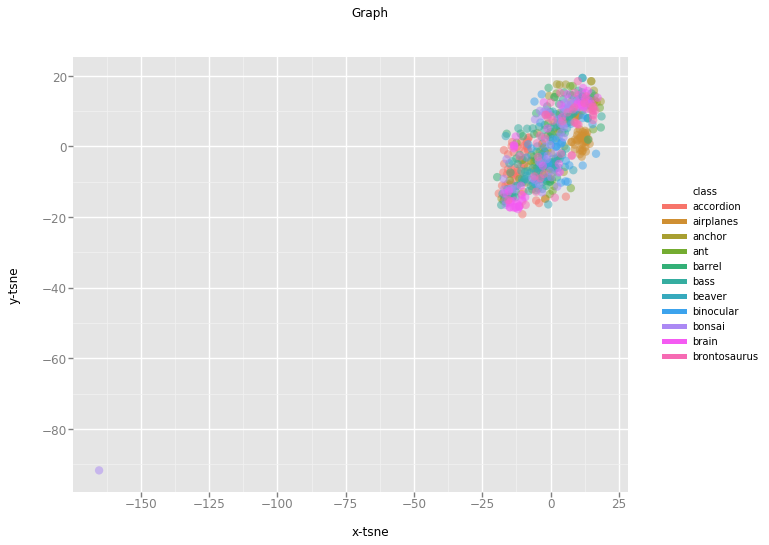

<ggplot: (105930328703)>

In [104]:
df_tsne = df.loc[random_perm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_result[:,0]
df_tsne['y-tsne'] = tsne_result[:,1]
chart = ggplot(df_tsne,aes(x='x-tsne', y = 'y-tsne',color = 'class')) + geom_point(size = 70,alpha = 0.5) + ggtitle("Graph")

chart

In [105]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feature_columns].values)

print("Cumulative explained variation for 50 pc {}".format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 pc 0.7967241208557772


In [106]:
n_sne = 513

time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_result = tsne.fit_transform(pca_result_50[random_perm[:n_sne]])
print("Done")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 513 samples in 0.002s...
[t-SNE] Computed neighbors for 513 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 513 / 513
[t-SNE] Mean sigma: 2127.875936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.359848
[t-SNE] Error after 300 iterations: 0.847618
Done


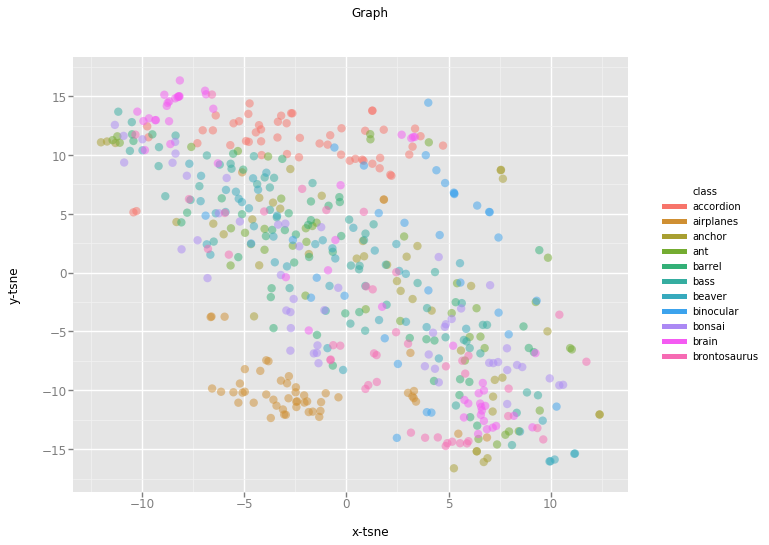

<ggplot: (-9223371930913284769)>

In [107]:
df_tsne = None
df_tsne = df.loc[random_perm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_result[:,0]
df_tsne['y-tsne'] = tsne_result[:,1]
chart = ggplot(df_tsne,aes(x='x-tsne', y = 'y-tsne',color = 'class')) + geom_point(size = 70,alpha = 0.5) + ggtitle("Graph")

chart